<h1> Data Visualization </h1>

<h4> Problem Statement</h4>
<h5>Use the inbuilt dataset &#39;titanic&#39; as used in the above problem.<br>
1. Plot a box plot for distribution of age with respect to each gender along with the
information about whether they survived or not. (Column names : &#39;sex&#39; and &#39;age&#39;)<br>
2. Write observations on the inference from the above statistics.</h5>

In [42]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [43]:
data = pd.read_csv('train9.csv')
data.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S


In [44]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

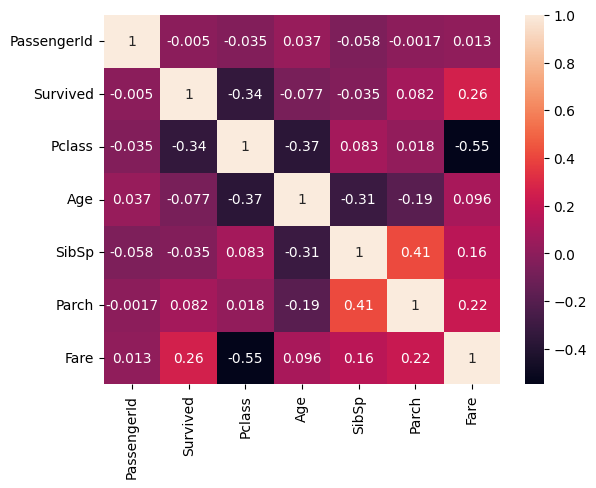

In [45]:
#Age has a lot of null values and is one of the attributes we need to use.
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), annot = True);

From the above corealtion matrix we can see that the attribute 'Age' is not highly dependant on any other attribute <br>
This means we can randomly fill in the missing data for 'Age' within the valid distribution. 

In [46]:
age_null_mask = data['Age'].isnull()

age_mean = data['Age'].mean()
age_std = data['Age'].std()

# generate random ages based on the age distribution of the dataset
age_random = np.random.normal(loc=age_mean, scale=age_std, size=age_null_mask.sum())

# fill in missing age values with random ages
data.loc[age_null_mask, 'Age'] = age_random

In [47]:
# 177 normal random values generated for 177 missing data points
age_random.size

177

In [48]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
data.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000000,4,2,347082,31.2750,NaN,S
280,281,0,3,"Duane, Mr. Frank",male,65.000000,0,0,336439,7.7500,NaN,Q
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.000000,0,0,234604,13.0000,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,NaN,C
252,253,0,1,"Stead, Mr. William Thomas",male,62.000000,0,0,113514,26.5500,C87,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.000000,1,2,113760,120.0000,B96 B98,S
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,22.204114,0,0,35852,7.7333,NaN,Q


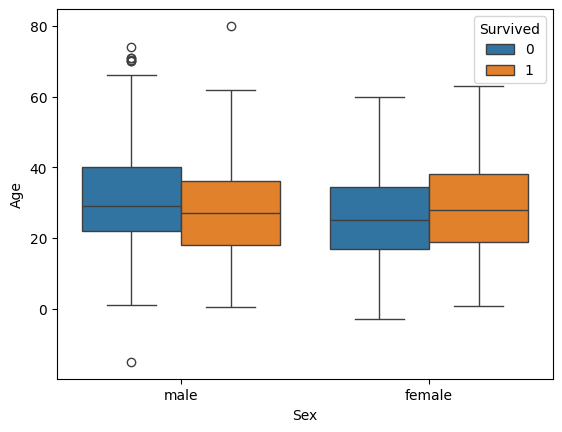

In [50]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=data);